In [1]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import xarray as xr
import numpy as np
import pprint
import glob
import skill_metrics as sm

cmip6_shdr_ens_all = xr.open_dataset("/Volumes/Thalassa/cmip6_clim_ens/shdr.nc")


SUBPLOTS_DATA= [{'axis_idx': (0, 0),
  'title': '(a) North Pacific',
  'y_label': True,
  'x_label': False,
  'observed': (0.6417962561010375, 0.0, 1.0),
  'modeled': {'E3SM-1-0': (0.5290332755904883,
    0.1842444317717712,
    0.9687355721981312),
   'NorESM2-LM': (0.5650551909528806, 0.16734024028641906, 0.969511172925415),
   'CMCC-CM2': (0.6579345572047829, 0.161183426979646, 0.9695452371825725),
   'MIROC6': (0.607964836722385, 0.1819415248921513, 0.9590479126780465),
   'IPSL-CM6A-LR': (0.8953953851559179,
    0.3134609420889149,
    0.9704650046027173),
   'NESM3': (0.8080119742712967, 0.2451089260380796, 0.9687118868061988),
   'FGOALS-f3-L': (0.48546413680627065,
    0.23098398063112474,
    0.9535995851496724),
   'EC-Earth3-Veg': (0.7832262097153558,
    0.2234630815820434,
    0.9702257755078825),
   'SAM0-UNICON': (0.5581379328307466,
    0.17799497495104596,
    0.9655461342917557),
   'MPI-ESM2': (0.6069263177272459, 0.16670077466308492, 0.9658900333892217),
   'EC-Earth3': (0.762159332205683, 0.20856153067832478, 0.970345924227985),
   'BCC-CSM2-MR': (0.5615598617896779, 0.1750904452080374, 0.9664007859209086),
   'ACCESS-CM2': (0.6090875495554307, 0.159781614084697, 0.9687136452139858),
   'CESM2': (0.5944866190821623, 0.16832977622673542, 0.9658007540272857),
   'GFDL-ESM4': (0.6703527938894845, 0.16334547624152299, 0.9699390163801195),
   'E3SM-1-1-ECA': (0.6871796369019576,
    0.17310597025526797,
    0.9683626183890319),
   'BCC-ESM1': (0.5902465105912577, 0.17064625537552416, 0.9650719235035415),
   'UKESM1-1': (0.7203947440902296, 0.1844893357065882, 0.9698726132275033),
   'MRI-ESM2': (0.6735216289695873, 0.16153904534955427, 0.9709802532371005),
   'CanESM5': (0.5678421871271957, 0.16437674826759613, 0.9704333075506536),
   'GISS-E2': (0.572751174377712, 0.17314638725558326, 0.9657057069968105),
   'FIO-ESM2': (0.5442051740168142, 0.18847802943494743, 0.9627794623240525)}},
 {'axis_idx': (0, 1),
  'title': '(b) Tropical Pacific',
  'y_label': False,
  'x_label': False,
  'observed': (0.059060911205874894, 0.0, 0.9999999999999999),
  'modeled': {'E3SM-1-0': (0.049655029072101974,
    0.03194437417263849,
    0.8411052008555477),
   'NorESM2-LM': (0.0536046278252138, 0.03293516270706497, 0.8333900001369154),
   'CMCC-CM2': (0.08819981273071338, 0.04304535146726388, 0.9036479539122563),
   'MIROC6': (0.03981333724944084, 0.03969877498172265, 0.7436596300234186),
   'IPSL-CM6A-LR': (0.07434986662428263,
    0.04470835931334133,
    0.7990188395519076),
   'NESM3': (0.11790139506974788, 0.0680618159201575, 0.9159739262244789),
   'FGOALS-f3-L': (0.03271086838791329,
    0.03572447574429039,
    0.8493961224688089),
   'EC-Earth3-Veg': (0.05508827681872957,
    0.03513041940519048,
    0.8127646161424777),
   'SAM0-UNICON': (0.04002287602784064,
    0.03254108399732195,
    0.8526780947437911),
   'MPI-ESM2': (0.06034577673220292, 0.018763003630215127, 0.9508428873809356),
   'EC-Earth3': (0.052741902572965, 0.03976730710375436, 0.7525655932634375),
   'BCC-CSM2-MR': (0.044964706304436254,
    0.0393150089236836,
    0.7463966215824369),
   'ACCESS-CM2': (0.05971019412903123,
    0.03886615512079769,
    0.7858868608849218),
   'CESM2': (0.0350731424903122, 0.03203501518838042, 0.8911803885304665),
   'GFDL-ESM4': (0.0644297155486022, 0.021903612271709547, 0.9407475347452153),
   'E3SM-1-1-ECA': (0.05961525598951059, 0.02463013120901, 0.913895499997774),
   'BCC-ESM1': (0.05528556074138702, 0.04229432035921118, 0.7282635384283017),
   'UKESM1-1': (0.08680456911750889, 0.053639145296917545, 0.7944658411871155),
   'MRI-ESM2': (0.05805346898524303, 0.05483010831289046, 0.5617385711776087),
   'CanESM5': (0.061187598295114685, 0.03640840449434502, 0.8172213688663094),
   'GISS-E2': (0.060229357637474404, 0.027899358541538095, 0.8907836532132146),
   'FIO-ESM2': (0.052473311637761, 0.017189150752514815, 0.9593319546450682)}},
 {'axis_idx': (0, 2),
  'title': '(c) South Pacific',
  'y_label': False,
  'x_label': False,
  'observed': (0.4322164973014129, 0.0, 1.0),
  'modeled': {'E3SM-1-0': (0.5327770760077902,
    0.1697187032882685,
    0.9594137338475608),
   'NorESM2-LM': (0.5206624634895496, 0.15717995613155733, 0.9624890425477663),
   'CMCC-CM2': (0.5034710828780659, 0.1580670014848284, 0.9542573928250719),
   'MIROC6': (0.4441372843179086, 0.12529860985684182, 0.9594776100627503),
   'IPSL-CM6A-LR': (0.5630322039333996,
    0.18938013891515643,
    0.9614712375858957),
   'NESM3': (0.7409850712802164, 0.35380243973015785, 0.9534166338527056),
   'FGOALS-f3-L': (0.45481899794883923,
    0.13581340793805918,
    0.9543840072121781),
   'EC-Earth3-Veg': (0.6233731965575726,
    0.2414062889192929,
    0.959663109474567),
   'SAM0-UNICON': (0.4967548723499908,
    0.14521011379476143,
    0.9605954123239431),
   'MPI-ESM2': (0.4969089367634888, 0.14229483496941694, 0.9626052502734539),
   'EC-Earth3': (0.6175878976313641, 0.23548258341247885, 0.9604964626210063),
   'BCC-CSM2-MR': (0.5108541034052555,
    0.15407471532561806,
    0.9602464245898404),
   'ACCESS-CM2': (0.4927615851035416, 0.14167683221230523, 0.961483140922092),
   'CESM2': (0.46367128685016945, 0.13136119675805152, 0.9594165608185654),
   'GFDL-ESM4': (0.5398075170207854, 0.1762676508557691, 0.9582226503940825),
   'E3SM-1-1-ECA': (0.5921553934428533,
    0.2147533346051265,
    0.9598761467725277),
   'BCC-ESM1': (0.5463555472552765, 0.17856597953777242, 0.9600707707293255),
   'UKESM1-1': (0.42643807317146515, 0.1201512057738876, 0.9609282104408167),
   'MRI-ESM2': (0.44288780411826856, 0.12259655829287992, 0.9610391464246503),
   'CanESM5': (0.4249301142030188, 0.11961131152895854, 0.9611955941964649),
   'GISS-E2': (0.5415567787984795, 0.1752265328456736, 0.9599498894430368),
   'FIO-ESM2': (0.4328211813755558, 0.12307127148769724, 0.9595178984927637)}},
 {'axis_idx': (1, 0),
  'title': '(d) North Atlantic',
  'y_label': True,
  'x_label': False,
  'observed': (0.6012425080660831, 0.0, 0.9999999999999998),
  'modeled': {'E3SM-1-0': (0.5084803741128844,
    0.17213111278712265,
    0.9656150964405533),
   'NorESM2-LM': (0.5117391582828503, 0.15535637100450142, 0.9737961725814568),
   'CMCC-CM2': (0.553245371468825, 0.15136862300778822, 0.96902196470428),
   'MIROC6': (0.549945440322247, 0.15288117348788852, 0.9686356752966512),
   'IPSL-CM6A-LR': (0.7864304182611384,
    0.24289674269208064,
    0.973876463479892),
   'NESM3': (0.784461592745762, 0.2460613641835475, 0.9714016036642726),
   'FGOALS-f3-L': (0.4271403910883758,
    0.22356171299158945,
    0.9617072689671436),
   'EC-Earth3-Veg': (0.6547382769681841,
    0.1621501348774813,
    0.9702394474417245),
   'SAM0-UNICON': (0.5294438459495135,
    0.15735858863807298,
    0.9692032825753734),
   'MPI-ESM2': (0.5928159782665724, 0.1466338938797015, 0.969936982047729),
   'EC-Earth3': (0.6226482190210535, 0.1500072277210081, 0.9705580027620412),
   'BCC-CSM2-MR': (0.545898924976312, 0.1483947359450771, 0.971119642539452),
   'ACCESS-CM2': (0.5759468645617885, 0.13971231676291376, 0.9727396065163292),
   'CESM2': (0.5392017380982418, 0.1566759502361757, 0.9680770041403138),
   'GFDL-ESM4': (0.6320388633206321, 0.1490210979086422, 0.9720284351860169),
   'E3SM-1-1-ECA': (0.6685436751540722,
    0.17935471661852018,
    0.9656198600744779),
   'BCC-ESM1': (0.5947764837388096, 0.14143422378079867, 0.9720895464285916),
   'UKESM1-1': (0.6798608538665164, 0.17204290343646703, 0.9713550188309285),
   'MRI-ESM2': (0.5717557216428125, 0.14351747561343536, 0.9713061807218516),
   'CanESM5': (0.5205062733092479, 0.1546314320163108, 0.9722119946785059),
   'GISS-E2': (0.501461289694725, 0.16765570897318277, 0.9698969243233148),
   'FIO-ESM2': (0.5048268305264533, 0.16750785445856134, 0.9690915073800774)}},
 {'axis_idx': (1, 1),
  'title': '(e) Tropical Atlantic',
  'y_label': False,
  'x_label': False,
  'observed': (0.0989690093445971, 0.0, 1.0),
  'modeled': {'E3SM-1-0': (0.06747005429075502,
    0.0622213663258719,
    0.7843999836603854),
   'NorESM2-LM': (0.11076265112327742,
    0.07275940624792927,
    0.7648782903330092),
   'CMCC-CM2': (0.15329713394520192, 0.08653656467198363, 0.8504768013763709),
   'MIROC6': (0.20399902778871962, 0.1206170660724377, 0.9128963663539933),
   'IPSL-CM6A-LR': (0.19902921633689746,
    0.1168012187884449,
    0.9078452003222752),
   'NESM3': (0.14244612894706893, 0.08747616671150592, 0.7956475718773156),
   'FGOALS-f3-L': (0.09970648313837832,
    0.058876513374581906,
    0.8243842728783447),
   'EC-Earth3-Veg': (0.19304842293737257,
    0.11335000728242108,
    0.8953907778990926),
   'SAM0-UNICON': (0.08636777277767341,
    0.06810468294371416,
    0.7379739913241588),
   'MPI-ESM2': (0.12676215130488644, 0.05679501190084286, 0.9022274983580733),
   'EC-Earth3': (0.19705033225420016, 0.11581419880772732, 0.9027533887536515),
   'BCC-CSM2-MR': (0.11816219726714898,
    0.06138099721093007,
    0.8546633588153957),
   'ACCESS-CM2': (0.09522075633755957,
    0.04352802486359688,
    0.9002197198139252),
   'CESM2': (0.1095435058753247, 0.04586384260577336, 0.9081451735924186),
   'GFDL-ESM4': (0.16530424674140964, 0.09769624662155314, 0.8427813674565603),
   'E3SM-1-1-ECA': (0.12722232863433341,
    0.07869399519695411,
    0.785780884457834),
   'BCC-ESM1': (0.11708807645011582, 0.05254123248129509, 0.895052578889729),
   'UKESM1-1': (0.0869585969346345, 0.04104195360587686, 0.9105185307522107),
   'MRI-ESM2': (0.09362440600605862, 0.03647920512344509, 0.9297334552529521),
   'CanESM5': (0.12868161688085894, 0.059905647836574885, 0.8937674506169684),
   'GISS-E2': (0.10494161545943248, 0.04073291781517057, 0.9218417284965507),
   'FIO-ESM2': (0.0966408345727376,
    0.046531504653518796,
    0.8870943412337656)}},
 {'axis_idx': (1, 2),
  'title': '(f) South Atlantic',
  'y_label': False,
  'x_label': False,
  'observed': (0.42158767114436857, 0.0, 1.0),
  'modeled': {'E3SM-1-0': (0.4478669245528121,
    0.13016466688310002,
    0.956962565491448),
   'NorESM2-LM': (0.4472816390551245, 0.12689857473496866, 0.9590518181418213),
   'CMCC-CM2': (0.4551686641972137, 0.13067662826297377, 0.9584438808000435),
   'MIROC6': (0.3905048148457472, 0.1326667767585712, 0.9494802707322754),
   'IPSL-CM6A-LR': (0.47530014421489264,
    0.1392434832541572,
    0.9588190892661008),
   'NESM3': (0.6838416385018568, 0.3023679912577145, 0.9607191791663737),
   'FGOALS-f3-L': (0.43914284232463163,
    0.14216852395792806,
    0.946246069703598),
   'EC-Earth3-Veg': (0.5641902769703754,
    0.20245048927395765,
    0.9565898558202978),
   'SAM0-UNICON': (0.48304359037640504,
    0.14531245444232455,
    0.9574287105555785),
   'MPI-ESM2': (0.4530451388468364, 0.13235849285615942, 0.9567294496447823),
   'EC-Earth3': (0.5484800966268835, 0.18898775433576004, 0.957586653750495),
   'BCC-CSM2-MR': (0.5007531290615679,
    0.15478660641693143,
    0.9580985954189586),
   'ACCESS-CM2': (0.4537483918763796, 0.13517809346890167, 0.95494176658019),
   'CESM2': (0.4312168396682868, 0.12849933718772616, 0.954841180284381),
   'GFDL-ESM4': (0.5049505142128786, 0.15175634901221427, 0.9622309352196631),
   'E3SM-1-1-ECA': (0.5654756542175596,
    0.2038323659192498,
    0.9562833584360441),
   'BCC-ESM1': (0.563160508963504, 0.20058473329346022, 0.9574778095340928),
   'UKESM1-1': (0.39523527380542134, 0.12298797663099965, 0.9566947356568153),
   'MRI-ESM2': (0.4097627798940282, 0.12299853102920086, 0.9566172811537522),
   'CanESM5': (0.4102736716398754, 0.1241049876036353, 0.9558467763896937),
   'GISS-E2': (0.49653994512407434, 0.15123015343378887, 0.9587916351363674),
   'FIO-ESM2': (0.4144324211499318, 0.12580318837299478, 0.9548555380524063)}},
 {'axis_idx': (2, 0),
  'title': '(g) Indian',
  'y_label': True,
  'x_label': False,
  'observed': (0.3402219674327887, 0.0, 1.0),
  'modeled': {'E3SM-1-0': (0.4069323096877007,
    0.12726180569432902,
    0.9575820673626774),
   'NorESM2-LM': (0.38232443757382584,
    0.11194714118919234,
    0.9586410525769384),
   'CMCC-CM2': (0.37994001277275957, 0.12581347610716923, 0.9448743872685555),
   'MIROC6': (0.3361450812217081, 0.11651717588874005, 0.9407171912228905),
   'IPSL-CM6A-LR': (0.39491957192397353,
    0.12562140275009573,
    0.9524081608026185),
   'NESM3': (0.5122787748951888, 0.2335131017277887, 0.9284954981745998),
   'FGOALS-f3-L': (0.3291398775645324,
    0.10008795841260998,
    0.9558191989182799),
   'EC-Earth3-Veg': (0.3993981063029615,
    0.12288361988568208,
    0.9573218045817273),
   'SAM0-UNICON': (0.307455699049944, 0.10289266016511085, 0.9545268560917001),
   'MPI-ESM2': (0.40747418047749495, 0.1354175539188471, 0.9501735281230276),
   'EC-Earth3': (0.4031315807770419, 0.12287194347713312, 0.9593891639660147),
   'BCC-CSM2-MR': (0.38697859320464545,
    0.11767287282598109,
    0.9557160666993791),
   'ACCESS-CM2': (0.37590993706125275,
    0.11125858767864373,
    0.9565853567930857),
   'CESM2': (0.37920224770056943, 0.1120167314872316, 0.9572589914988298),
   'GFDL-ESM4': (0.3665443821504144, 0.10780723726982361, 0.9561789674191542),
   'E3SM-1-1-ECA': (0.3999458814856366,
    0.12281944996121423,
    0.9576775201535183),
   'BCC-ESM1': (0.3838811105931962, 0.11343617250141405, 0.9580350585659633),
   'UKESM1-1': (0.3565368429927499, 0.10352829062752092, 0.9569176082884311),
   'MRI-ESM2': (0.3706699208023819, 0.1085472571444843, 0.9569604912812617),
   'CanESM5': (0.39476318613118294, 0.1268262445912618, 0.9511933806432898),
   'GISS-E2': (0.3872976941352974, 0.11543677434367619, 0.9578441136373138),
   'FIO-ESM2': (0.31457215849249603, 0.1001388164038006, 0.9562255267434902)}},
 {'axis_idx': (2, 1),
  'title': '(h) Southern Ocean',
  'y_label': False,
  'x_label': False,
  'observed': (0.13753659484876776, 0.0, 0.9999999999999998),
  'modeled': {'E3SM-1-0': (0.1853301742581534,
    0.06761018730912664,
    0.9551404510099262),
   'NorESM2-LM': (0.14306463979317524,
    0.044435301176135956,
    0.9506028887643106),
   'CMCC-CM2': (0.14709798313083394, 0.04685449361303491, 0.9480033998679542),
   'MIROC6': (0.18120093019180963, 0.06647962542236474, 0.9495828841131904),
   'IPSL-CM6A-LR': (0.2897608061565265,
    0.16329444332596388,
    0.9561778319497515),
   'NESM3': (0.19609079462057968, 0.08887514483494834, 0.9171254470803325),
   'FGOALS-f3-L': (0.25640702027414725,
    0.1346642999521069,
    0.9432262005735192),
   'EC-Earth3-Veg': (0.2871404684173886,
    0.16234396538689583,
    0.9496833323235038),
   'SAM0-UNICON': (0.20375290639085908,
    0.08382971470433831,
    0.9528463084359388),
   'MPI-ESM2': (0.1845442264101508, 0.07547331731052583, 0.9313182319070774),
   'EC-Earth3': (0.2645881377276889, 0.14043951792855414, 0.9507954194092559),
   'BCC-CSM2-MR': (0.15052554629002476,
    0.04869992935697317,
    0.9467952804021884),
   'ACCESS-CM2': (0.2270320206962543, 0.1033698256028461, 0.9571517772384388),
   'CESM2': (0.18118923873088466, 0.06523099042388218, 0.9528588570453318),
   'GFDL-ESM4': (0.18045640893186615, 0.06877026153513682, 0.9418349540374978),
   'E3SM-1-1-ECA': (0.21834137872812498,
    0.0960727317463957,
    0.9550355809958512),
   'BCC-ESM1': (0.17192687290684733, 0.05980115984633161, 0.9493896739636447),
   'UKESM1-1': (0.14143782972173127, 0.043286198619977095, 0.9522313508866664),
   'MRI-ESM2': (0.18110391209807583, 0.06390907289853293, 0.9561140595906078),
   'CanESM5': (0.12019181874023249, 0.043125126522770424, 0.9528474792360901),
   'GISS-E2': (0.1639202976345889, 0.055864390539402696, 0.9462247482235517),
   'FIO-ESM2': (0.18437038841988723, 0.0671251267793448, 0.9544047633091692)}}]


In [37]:
marker_styles = ['s', 'D', '^', 'v', '<', '>', '*', 'p', 'X', 'H', 'h', 
                 'd', 'o', '8', 'P', '.', '1', '2', '3', '4']

face_colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black', 'white', 'gray', 'orange', 
               'purple', 'brown', 'pink', 'lime', 'navy', 'teal', 'olive', 'maroon', 'chocolate', 
               'gold', 'silver', 'violet']


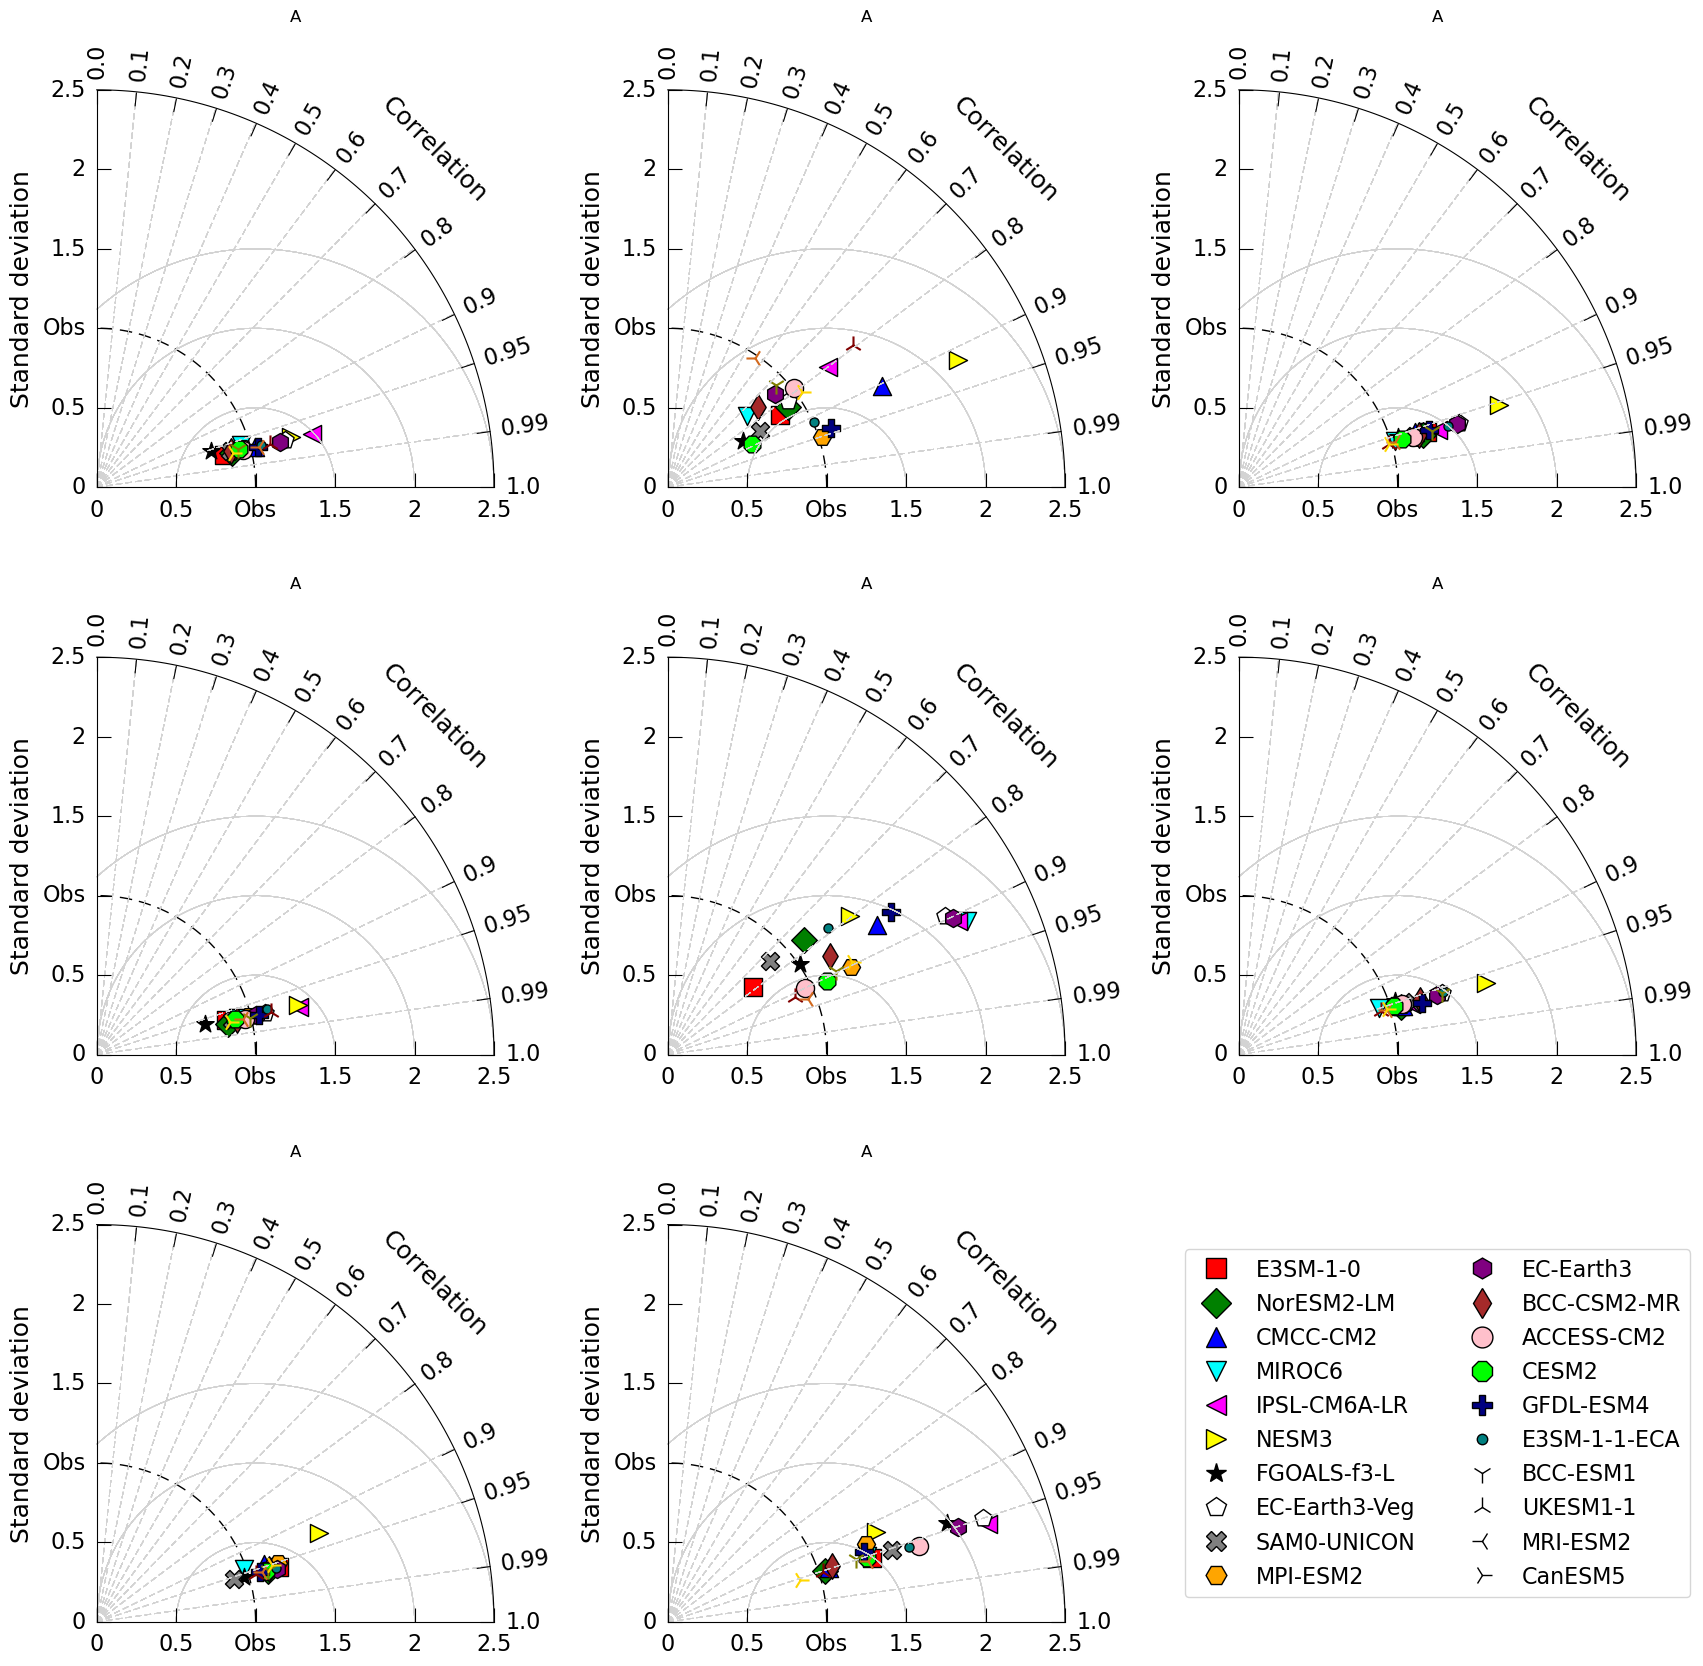

In [67]:
from matplotlib.gridspec import GridSpec
import geocat.viz as gv

fig = plt.figure(figsize=(20, 20))
gs = GridSpec(3, 3, figure=fig, wspace=0.4, hspace=0.4)
j=0

for subplot_data in SUBPLOTS_DATA:
    
    stdev_obs, crmsd_obs, ccoef_obs = np.array(subplot_data["observed"])
    model_names = np.array([m[0] for m in subplot_data["modeled"].items()])
    values = np.array([m[1] for m in subplot_data["modeled"].items()])
    stdev=values[:,0]/stdev_obs
    crmsd=values[:,1]
    ccoef=values[:,2]

    std_range = (0, 2.5)
    std_levels = np.atleast_1d([0, 0.5, 1, 1.5,2, 2.5]) 

    taylor = gv.TaylorDiagram(rect=gs[j],fig=fig,label='Obs', std_range=std_range, std_level=std_levels)
    
    taylor._ax.axis["right"].label.set_text("Standard deviation")
    taylor._ax.axis["bottom"].set_visible(False)
    
    for std, corr, marker, facecolor in zip(stdev, ccoef, marker_styles, face_colors):
        taylor.add_model_set([std], [corr], marker=marker, edgecolor='k',facecolors=facecolor, s=170, annotate_on=False)

        taylor.add_corr_grid([np.arange(0,1,0.1),0.95,0.99])

        taylor.add_contours(levels=np.arange(0, 1.6, 0.5),
                 colors='lightgrey',
                 linewidths=0.5);
        #taylor.add_title('North Atlantic')
        plt.title('A',loc='center', pad=20, x=0.5, y=1.09)

        

    j+=1


ax_last = fig.add_subplot(gs[-1])
ax_last.axis("off")  # Hide axis

# Create legend handles for each model with its corresponding marker and color
legend_handles = []
for model_name, marker, facecolor in zip(model_names, marker_styles, face_colors):
    legend_handles.append(mlines.Line2D([], [], 
                                        marker=marker,
                                        markersize=15,
                                        markerfacecolor=facecolor,
                                        markeredgecolor='black',
                                        linestyle='None',
                                        label=model_name,))

# Add the legend in the last subplot
ax_last.legend(handles=legend_handles, loc="center", ncol=2, bbox_to_anchor=(0.5, 0.5), fontsize=16)


In [ ]:
ax_last = fig.add_subplot(gs[-1])  # Last subplot
ax_last.axis("off")  # Hide axis

for marker_label, marker_desc in MARKERS.items():
    legend_handles.append(mlines.Line2D([], [], 
                                        marker=marker_desc["marker"],
                                        markersize=marker_desc["markersize"],
                                        markerfacecolor=marker_desc["color_face"],
                                        markeredgecolor=marker_desc["color_edge"],
                                        linestyle='None',
                                        label=marker_label))

ax_last.legend(handles=legend_handles, loc="center", ncol=2, bbox_to_anchor=(0.5, 0.5))


In [41]:
model_names

array(['E3SM-1-0', 'NorESM2-LM', 'CMCC-CM2', 'MIROC6', 'IPSL-CM6A-LR',
       'NESM3', 'FGOALS-f3-L', 'EC-Earth3-Veg', 'SAM0-UNICON', 'MPI-ESM2',
       'EC-Earth3', 'BCC-CSM2-MR', 'ACCESS-CM2', 'CESM2', 'GFDL-ESM4',
       'E3SM-1-1-ECA', 'BCC-ESM1', 'UKESM1-1', 'MRI-ESM2', 'CanESM5',
       'GISS-E2', 'FIO-ESM2'], dtype='<U13')

In [68]:

cmip6_shdr_ens_all

<xarray.Dataset> Size: 1GB
Dimensions:  (param: 8, lev: 379, model: 22, month: 12, lat: 180, lon: 360)
Coordinates:
  * param    (param) <U2 64B 'D1' 'a1' 'a2' 'a3' 'b2' 'b3' 'c2' 'em'
  * lev      (lev) float64 3kB 0.0 0.5058 0.5126 ... 1.471e+03 1.48e+03 1.5e+03
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
  * model    (model) <U13 1kB 'E3SM-1-0' 'NorESM2-LM' ... 'GISS-E2' 'FIO-ESM2'
Data variables:
    shdr     (model, month, param, lat, lon) float64 1GB ...

/var/folders/7k/p5ykrvrj5zv_t9x91y1lsv9w0000gn/T/ipykernel_32419/1012827522.py:11: MatplotlibDeprecationWarning: Passing `apply_theta_transforms=True` (the default) is deprecated since Matplotlib 3.9. Support for this will be removed in Matplotlib in 3.11. To prevent this warning, set `apply_theta_transforms=False`, and make sure to shift theta values before being passed to this transform.
  tr = PolarAxes.PolarTransform()


TypeError: can't multiply sequence by non-int of type 'float'

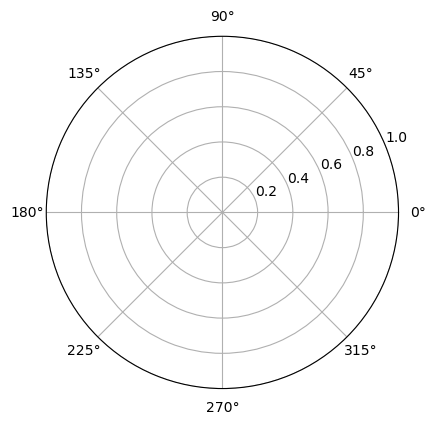

In [72]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.projections import PolarAxes
from mpl_toolkits.axisartist import floating_axes
from mpl_toolkits.axisartist.grid_finder import FixedLocator, MaxNLocator, DictFormatter

# Taylor Diagram class
class TaylorDiagram:
    def __init__(self, refstd, fig=None, rect=111, label='_', ylabel='Standard deviation'):
        self.refstd = refstd
        tr = PolarAxes.PolarTransform()
        rlocs = np.concatenate((np.arange(10)/10.,[0.95,0.99,1.0]))
        tlocs = np.arccos(rlocs)
        gl1 = FixedLocator(tlocs)
        tf1 = DictFormatter(dict(zip(tlocs, map(str,rlocs))))
        rlocs = np.concatenate((np.arange(0,1.1,0.1)*refstd,[0.95,0.99,1.0]*refstd))
        gl2 = FixedLocator(rlocs)
        tf2 = DictFormatter(dict(zip(rlocs, map(str,rlocs))))

        ghelper = floating_axes.GridHelperCurveLinear(tr,
                                                      extremes=(0,np.pi/2,0,refstd),
                                                      grid_locator1=gl1,
                                                      tick_formatter1=tf1,
                                                      grid_locator2=gl2,
                                                      tick_formatter2=tf2)

        if fig is None:
            fig = plt.figure()
        
        ax = floating_axes.FloatingSubplot(fig, rect, grid_helper=ghelper)
        fig.add_subplot(ax)
        ax.axis["top"].set_axis_direction("bottom")
        ax.axis["top"].toggle(ticklabels=True, label=True)
        ax.axis["top"].set_label("Correlation")

        ax.axis["left"].set_axis_direction("bottom")
        ax.axis["left"].toggle(ticklabels=True, label=True)
        ax.axis["left"].set_label(ylabel)  # Set custom ylabel here

        ax.axis["right"].set_axis_direction("top")
        ax.axis["right"].toggle(ticklabels=True)

        ax.axis["bottom"].set_visible(False)
        ax.grid(True)

        self.ax = ax
        self.samplePoints = [self.ax.plot([0],[refstd], 'ko', ls='', ms=8, label=label)[0]]

    def add_sample(self, stddev, corrcoef, *args, **kwargs):
        l, = self.ax.plot(np.arccos(corrcoef), stddev, *args, **kwargs)
        self.samplePoints.append(l)
        return l

# Sample data
refstd = 1.0
samples = [(0.5, 0.8), (1.0, 0.9), (1.5, 0.7)]

# Creating the gridspec
fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])

# Adding the Taylor diagram to the subplot
taylor_ax = plt.subplot(gs[0], projection='polar')
taylor_diag = TaylorDiagram(refstd, fig, rect=gs[0], ylabel='Custom Y-Label')
for stddev, corrcoef in samples:
    taylor_diag.add_sample(stddev, corrcoef)

# Adding another plot to the second subplot
other_ax = plt.subplot(gs[1])
other_ax.plot([0, 1, 2], [0, 1, 4])

plt.tight_layout()
plt.show()